In [ ]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset=pd.read_excel(r'E:\excelR\DATA SCIENCE\ASSIGNMENTS\Clustering\EastWestAirlines.xlsx', sheet_name= 'Data')

In [ ]:
dataset.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
print(dataset.cc1_miles.unique())
print(dataset.cc2_miles.unique())
print(dataset.cc3_miles.unique())

[1 4 3 2 5]
[1 2 3]
[1 3 2 4 5]


In [ ]:
null_count = dataset.isnull().sum().value_counts(ascending=False)
null_count

0    12
dtype: int64

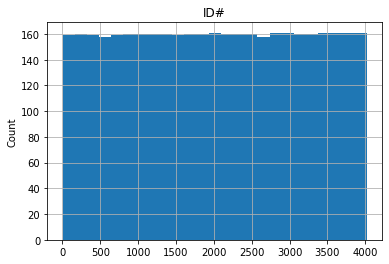

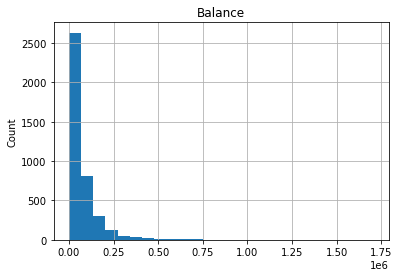

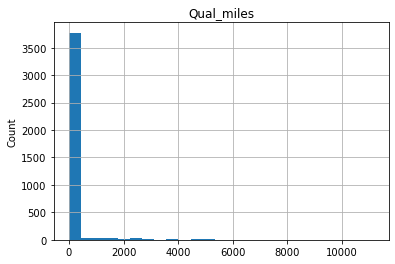

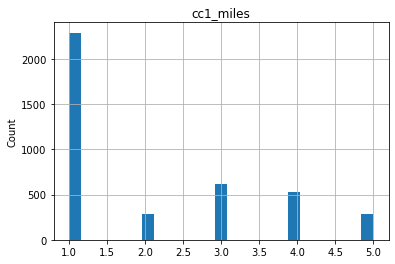

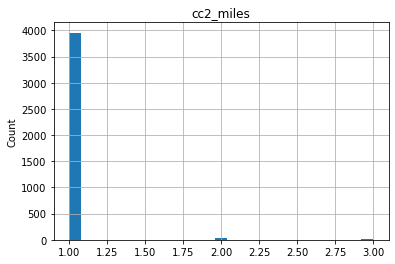

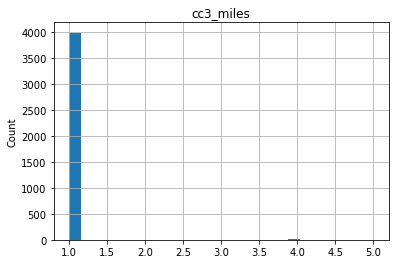

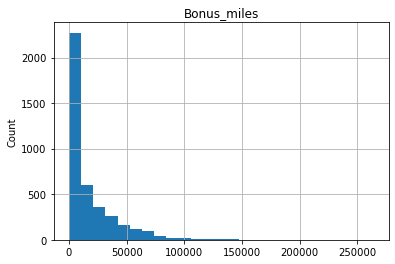

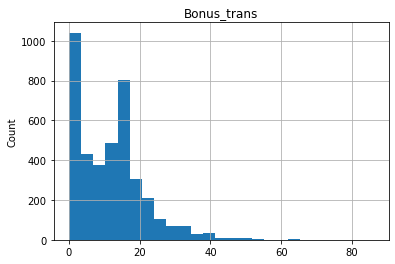

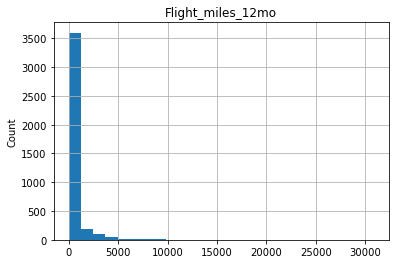

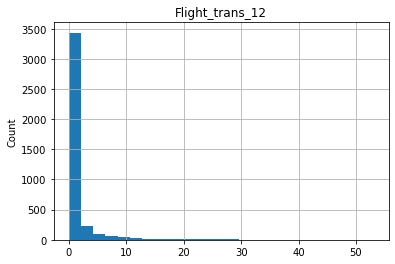

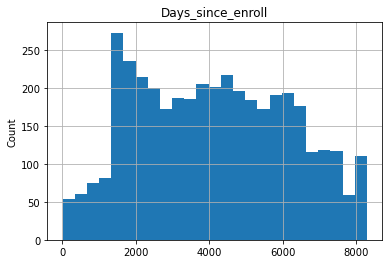

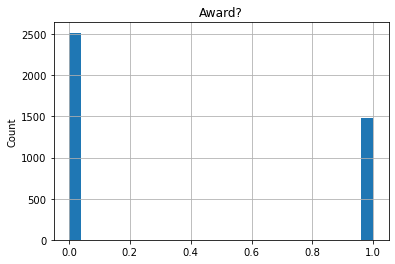

In [ ]:
for feature in dataset.columns:
    dataset=dataset.copy()
    dataset[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()


<AxesSubplot:>

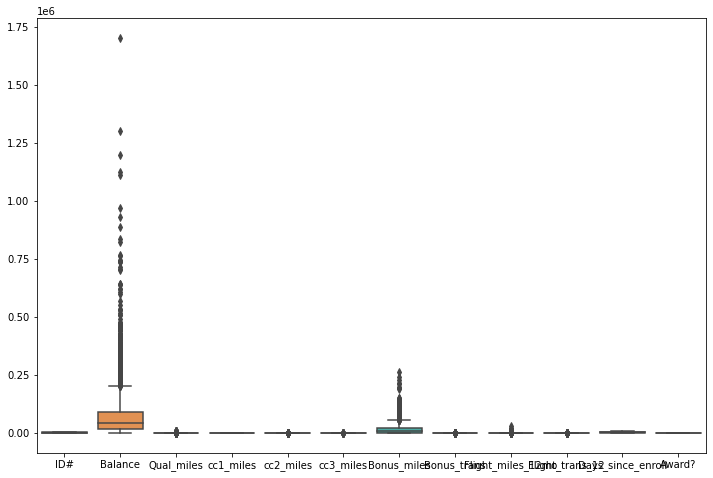

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.boxplot(data=dataset) #finding out the outliers

<AxesSubplot:>

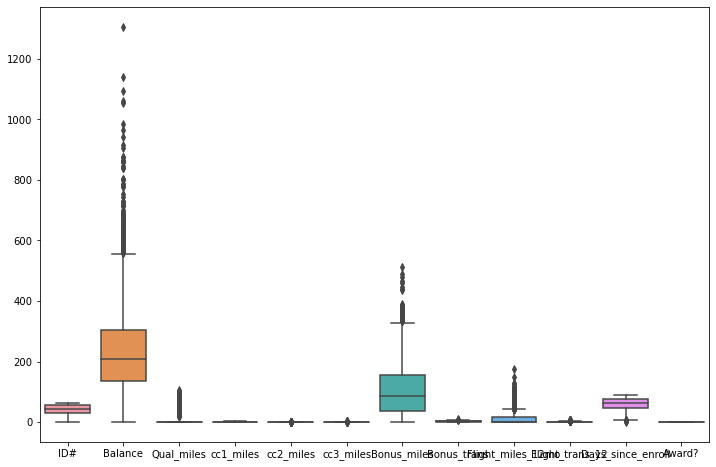

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(dataset))

In [ ]:
dataset.rename(columns = {'cc1_miles':'FreqFlyerMiles','cc2_miles':'RewardMiles','cc3_miles':'SmallbusinessMiles','ID#':'ID','Award?':'Award'}, inplace = True)


#Set ID as Index Column
dataset.set_index('ID',inplace=True)
dataset

,Balance,Qual_miles,FreqFlyerMiles,RewardMiles,SmallbusinessMiles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [ ]:
#passengers without Award
len(dataset[dataset.Award == 0])

2518

In [ ]:
##passengers with Award
len(dataset[dataset.Award == 1])

1481

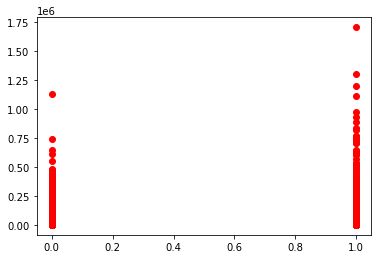

In [ ]:
plt.scatter(dataset['Award'], dataset['Balance'],color ='r')



In [ ]:
corr_matrix = dataset.corr()

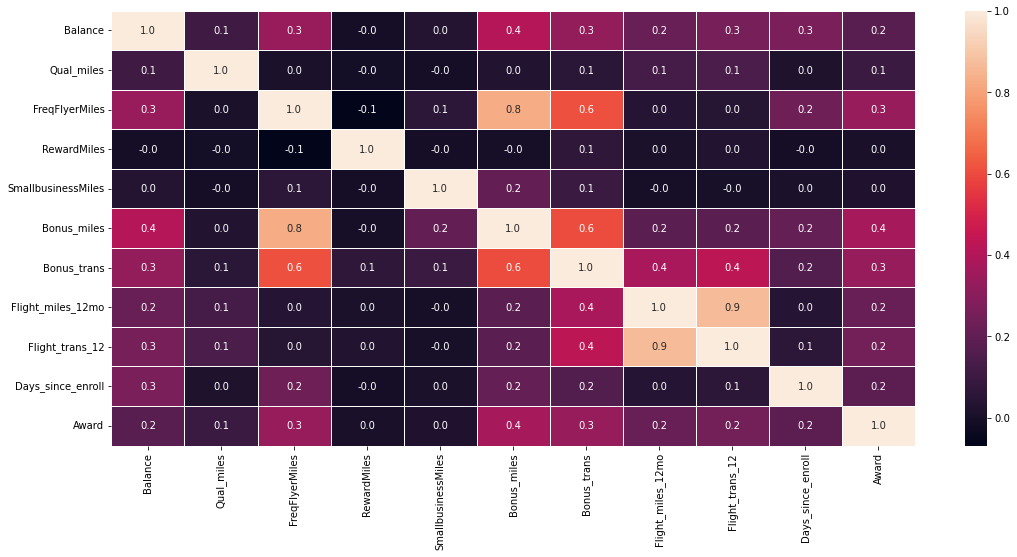

In [ ]:
f,ax = plt.subplots(figsize=(18,8))
sns.heatmap(dataset.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

In [ ]:
standard_scaler = StandardScaler()
dataset_std = standard_scaler.fit_transform(dataset)
dataset_std.shape

(3999, 11)

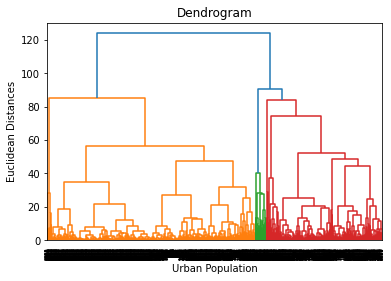

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram1 = sch.dendrogram(sch.linkage(dataset_std,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Urban Population')
plt.ylabel('Euclidean Distances')
plt.show()

In [ ]:
unique_colors1 = set(dendrogram1['color_list'])
print(unique_colors1)

{'C1', 'C2', 'C0', 'C3'}


In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc1 = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean', linkage = 'ward')
y_hc1 = hc1.fit_predict(dataset_std)

In [ ]:
y_hc1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

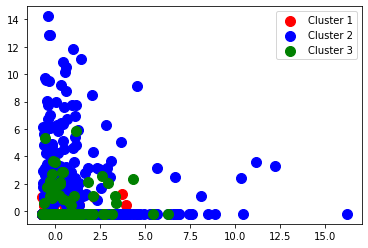

In [ ]:
#Visualizing a cluster
plt.scatter(dataset_std[y_hc1 == 0,0], dataset_std[y_hc1 == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(dataset_std[y_hc1 == 1,0],dataset_std[y_hc1 == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(dataset_std[y_hc1 == 2,0], dataset_std[y_hc1 == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc2 = AgglomerativeClustering(n_clusters = 2,affinity = 'euclidean', linkage = 'ward')
y_hc2 = hc2.fit_predict(dataset_std)

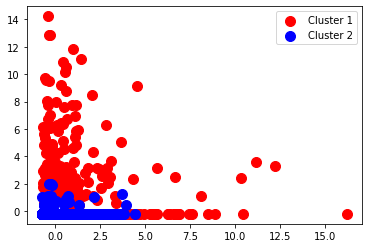

In [ ]:
#Visualizing a cluster
plt.scatter(dataset_std[y_hc2 == 0,0], dataset_std[y_hc2 == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(dataset_std[y_hc2 == 1,0],dataset_std[y_hc2 == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(dataset_std[y_hc1 == 2,0], dataset_std[y_hc1 == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.legend()
plt.show()

# CLUSTERING FOR CRIME DATA

# HIERARCHICAL CLUSTERING

In [ ]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset=pd.read_csv('CRIME DATA.csv')

In [ ]:
dataset.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
dataset.rename(columns = {'Unnamed: 0':'State'}, inplace = True)

In [ ]:
dataset.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Text(0, 0.5, 'Murder Rate')

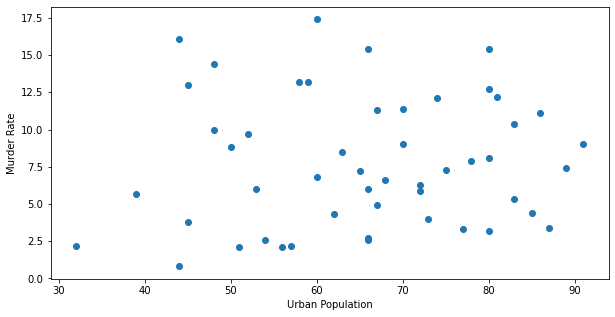

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Murder',data=dataset)
plt.xlabel('Urban Population')
plt.ylabel('Murder Rate')

Text(0, 0.5, 'Assault Rate')

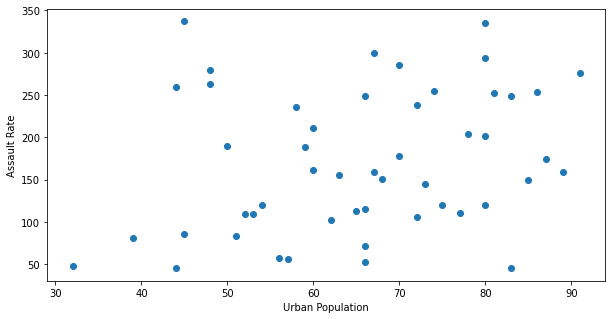

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Assault',data=dataset)
plt.xlabel('Urban Population')
plt.ylabel('Assault Rate')

Text(0, 0.5, 'Rape Rate')

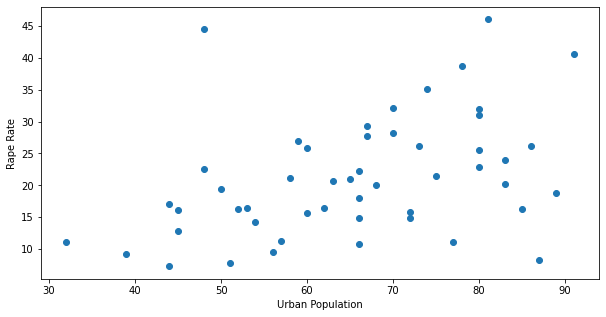

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Rape',data=dataset)
plt.xlabel('Urban Population')
plt.ylabel('Rape Rate')

In [ ]:
#from sklearn.preprocessing import LabelEncoder

In [ ]:
#label_encoder = LabelEncoder()

In [ ]:
#dataset['City'] = label_encoder.fit_transform(dataset['City'])

In [ ]:
#dataset.info()

In [ ]:
crime_data = dataset.iloc[:,1:].values
crime_data

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(crime_data)


In [ ]:
data_scaled

array([[0.05403139, 0.96601575, 0.23741065, 0.08677769],
       [0.0368722 , 0.96973889, 0.17698657, 0.1640813 ],
       [0.02643862, 0.95962381, 0.26112213, 0.10118482],
       [0.04452761, 0.9613916 , 0.25299779, 0.09866914],
       [0.03065655, 0.94013412, 0.30997176, 0.13829509],
       [0.03559422, 0.91914181, 0.35143658, 0.17436661],
       [0.02448606, 0.81620208, 0.57134146, 0.08236221],
       [0.02367351, 0.95496538, 0.28889709, 0.06339686],
       [0.04447826, 0.96754652, 0.23105589, 0.09213353],
       [0.07853358, 0.95233247, 0.27080544, 0.11644634],
       [0.05454612, 0.47341917, 0.85421286, 0.20789277],
       [0.01964047, 0.90648301, 0.40791735, 0.10726716],
       [0.03942842, 0.94400732, 0.31466911, 0.09098866],
       [0.05444736, 0.85452107, 0.49153867, 0.1588048 ],
       [0.02725092, 0.69365977, 0.70604655, 0.13997063],
       [0.04479483, 0.85856764, 0.49274317, 0.1343845 ],
       [0.07934635, 0.89162397, 0.42536189, 0.13333459],
       [0.0594568 , 0.96134697,

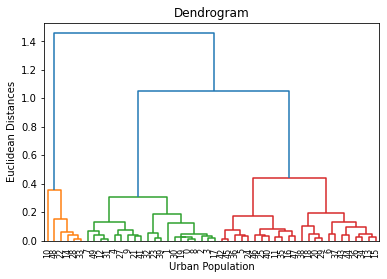

In [ ]:
dataset_std

In [ ]:
#dictionary of dendrogram
print(dendrogram)

{'icoord': [[45.0, 45.0, 55.0, 55.0], [35.0, 35.0, 50.0, 50.0], [25.0, 25.0, 42.5, 42.5], [15.0, 15.0, 33.75, 33.75], [5.0, 5.0, 24.375, 24.375], [85.0, 85.0, 95.0, 95.0], [75.0, 75.0, 90.0, 90.0], [65.0, 65.0, 82.5, 82.5], [105.0, 105.0, 115.0, 115.0], [135.0, 135.0, 145.0, 145.0], [125.0, 125.0, 140.0, 140.0], [110.0, 110.0, 132.5, 132.5], [73.75, 73.75, 121.25, 121.25], [165.0, 165.0, 175.0, 175.0], [155.0, 155.0, 170.0, 170.0], [215.0, 215.0, 225.0, 225.0], [205.0, 205.0, 220.0, 220.0], [195.0, 195.0, 212.5, 212.5], [245.0, 245.0, 255.0, 255.0], [235.0, 235.0, 250.0, 250.0], [203.75, 203.75, 242.5, 242.5], [185.0, 185.0, 223.125, 223.125], [162.5, 162.5, 204.0625, 204.0625], [97.5, 97.5, 183.28125, 183.28125], [265.0, 265.0, 275.0, 275.0], [295.0, 295.0, 305.0, 305.0], [285.0, 285.0, 300.0, 300.0], [270.0, 270.0, 292.5, 292.5], [325.0, 325.0, 335.0, 335.0], [315.0, 315.0, 330.0, 330.0], [345.0, 345.0, 355.0, 355.0], [365.0, 365.0, 375.0, 375.0], [350.0, 350.0, 370.0, 370.0], [322.5

In [ ]:
print(dendrogram['color_list'])

['C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C0', 'C0']


In [ ]:
unique_colors = set(dendrogram['color_list'])
print(unique_colors)

{'C1', 'C2', 'C0', 'C3'}


In [ ]:
#from the dendrogram we can extract the colour list

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_scaled)

In [ ]:
y_hc


array([2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 2], dtype=int64)

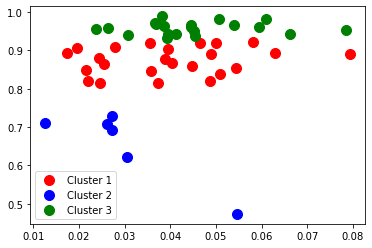

In [ ]:
#Visualizing a cluster
plt.scatter(data_scaled[y_hc == 0,0], data_scaled[y_hc == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_scaled[y_hc == 1,0],data_scaled[y_hc == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_scaled[y_hc == 2,0], data_scaled[y_hc == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.legend()
plt.show()

# CRIME DATA KMEANS CLUSTERING

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


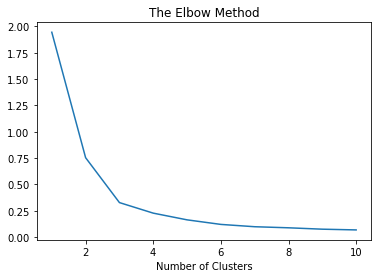

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel("Number of Clusters")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [ ]:
y_kmeans = kmeans.fit_predict(data_scaled)

In [ ]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1,
       2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 2, 1])

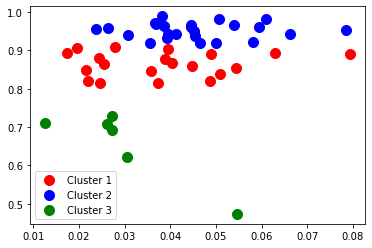

In [ ]:
#Visualizing a cluster
plt.scatter(data_scaled[y_kmeans == 0,0], data_scaled[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_scaled[y_kmeans == 1,0], data_scaled[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_scaled[y_kmeans == 2,0], data_scaled[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.legend()
plt.show()

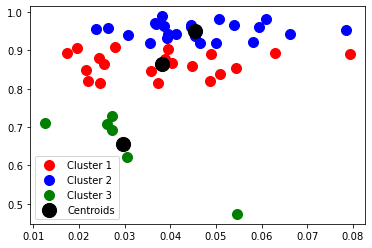

In [ ]:
plt.scatter(data_scaled[y_kmeans == 0,0], data_scaled[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_scaled[y_kmeans == 1,0], data_scaled[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_scaled[y_kmeans == 2,0], data_scaled[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c= 'black',label = 'Centroids')
plt.legend()
plt.show()



# CRIME DATA DBSCAN

In [ ]:
dataset1=pd.read_csv('CRIME DATA.csv')

In [ ]:
dataset1.drop(['Unnamed: 0'],axis=1,inplace=True)
dataset1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [ ]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
from sklearn.preprocessing import StandardScaler
crime_norm=pd.DataFrame(StandardScaler().fit_transform(dataset1))
crime_norm

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm)

DBSCAN(eps=1, min_samples=4)

In [ ]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

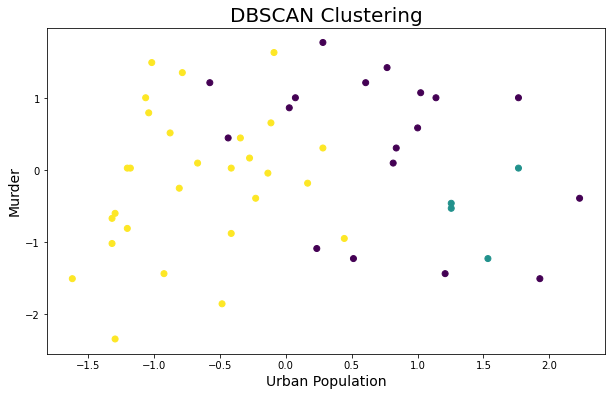

In [ ]:
#df['DBSCAN_labels']=dbscan.labels_
import matplotlib
import matplotlib.pyplot as plt


# Plotting resulting clusters
plt.figure(figsize=(10,6))
plt.scatter(crime_norm[0],crime_norm[2],c=dbscan.labels_ )
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Urban Population',fontsize=14)
plt.ylabel('Murder',fontsize=14)
plt.show()

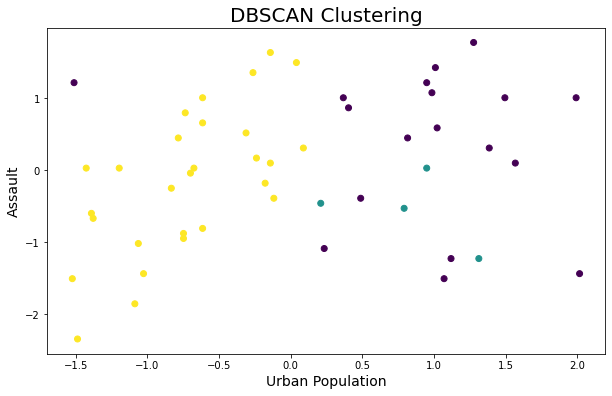

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(crime_norm[1],crime_norm[2],c=dbscan.labels_ )
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Urban Population',fontsize=14)
plt.ylabel('Assault',fontsize=14)
plt.show()

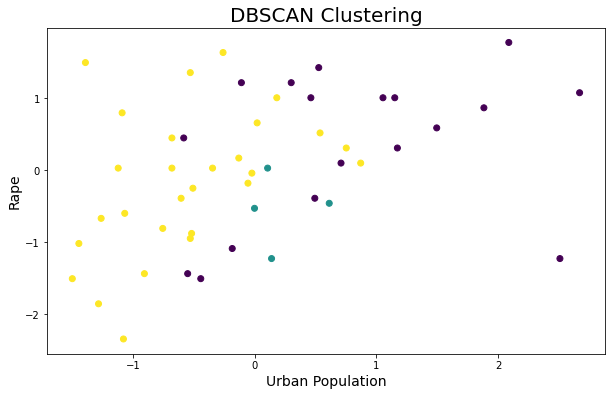

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(crime_norm[3],crime_norm[2],c=dbscan.labels_ )
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Urban Population',fontsize=14)
plt.ylabel('Rape',fontsize=14)
plt.show()

In [ ]:
# Adding clusters to dataset
dataset1['clusters']=dbscan.labels_
dataset1

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [ ]:
# Adding clusters to dataset
crime_norm['clusters']=dbscan.labels_
crime_norm.head()

,0,1,2,3,clusters
0,1.255179,0.790787,-0.526195,-0.003451,0
1,0.513019,1.118060,-1.224067,2.509424,-1
2,0.072361,1.493817,1.009122,1.053466,-1
3,0.234708,0.233212,-1.084492,-0.186794,-1
4,0.281093,1.275635,1.776781,2.088814,-1


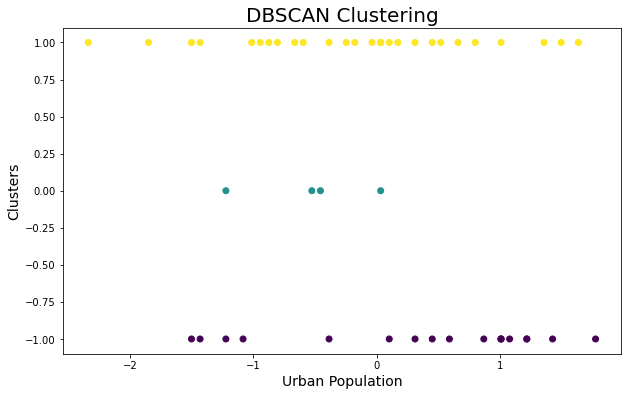

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(crime_norm[2],crime_norm['clusters'],c=dbscan.labels_ )
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Urban Population',fontsize=14)
plt.ylabel('Clusters',fontsize=14)
plt.show()